<a href="https://colab.research.google.com/github/ThiagoBalbo16/Course-DDS4-FLAI/blob/main/Class_10_Bagging_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Course: Curso Dominando Data Science [FLAI] \\
Description: Bagging and Random Forest \\
Author: FLAI \\
Adapted by : Thiago Balbo Batista \\
Year: 2021

#### Importing and Preparing the Data

In [ ]:
# Import the dataset via github:

import pandas as pd
url = 'https://raw.githubusercontent.com/ThiagoBalbo16/Course-Dominando-Data-Science-DDS4-FLAI/main/insurance.csv'
data = pd.read_csv(url)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
print(data.shape)

(1338, 3)


In [ ]:
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})
data['charges'] = data['charges']/1000 
data = data[['bmi', 'smoker', 'charges']]
data.head()

,bmi,smoker,charges
0,27.900,1,16.884924
1,33.770,0,1.725552
2,33.000,0,4.449462
3,22.705,0,21.984471
4,28.880,0,3.866855


In [ ]:
X = data[['bmi', 'charges']]
y = data['smoker']

#### Upgrade the Validation: Repeated K-Fold

In [ ]:
# Configurate the Cross Validation:

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate

validation = RepeatedKFold(n_splits = 10, n_repeats = 5)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Logistic Regression

model = LogisticRegression() 
measures = cross_validate(model, X, y, cv = validation, scoring = 'accuracy')
round(measures['test_score'].mean(),3)

0.933

In [ ]:
# KNN

model = KNeighborsClassifier(n_neighbors = 25) 
measures = cross_validate(model, X, y, cv = validation, scoring = 'accuracy')
round(measures['test_score'].mean(),3)

0.962

In [ ]:
# Decision Tree

model = DecisionTreeClassifier(max_depth = 3) 
measures = cross_validate(model, X, y, cv = validation, scoring = 'accuracy')
round(measures['test_score'].mean(),3)

0.962

#### Hard Voting

In [ ]:
# Combination via Hard Voting

from sklearn.ensemble import VotingClassifier
 
logreg = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors = 25)
tree = DecisionTreeClassifier(max_depth = 3)

models = [('Log. Reg', logreg), ('KNN', knn), ('Tree', tree)]

model = VotingClassifier(models, voting = 'hard')

measures = cross_validate(model, X, y, cv = validation, scoring = 'accuracy')
round(measures['test_score'].mean(),3)

0.964

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


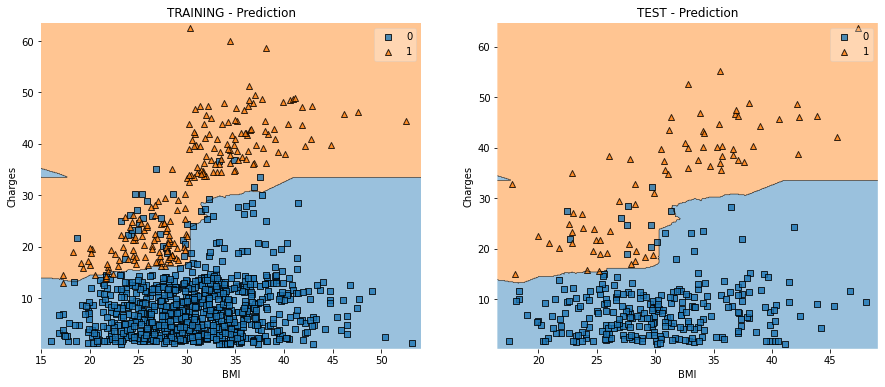

In [ ]:
# Decision Regions

from sklearn.model_selection import train_test_split 
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

X = data[['bmi', 'charges']]
y = data['smoker']

Xtraining, Xtest, ytraining, ytest  = train_test_split(X, y, test_size = 0.25)
 
model.fit(Xtraining, ytraining)

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(Xtraining.values, ytraining.values, clf = model, legend = 1)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('TRAINING - Prediction')  

plt.subplot(1, 2, 2)
plot_decision_regions(Xtest.values, ytest.values, clf = model, legend = 1)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('TEST - Prediction')   

plt.show()

#### Soft Voting

In [ ]:
# Combination via Soft Voting

from sklearn.ensemble import VotingClassifier
 
logreg = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors = 25)
tree = DecisionTreeClassifier(max_depth = 3)

models = [('Log. Reg', logreg), ('KNN', knn), ('Tree', tree)]

model = VotingClassifier(models, voting = 'soft')

measures = cross_validate(model, X, y, cv = validation, scoring = 'accuracy')
round(measures['test_score'].mean(),3)

0.965

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


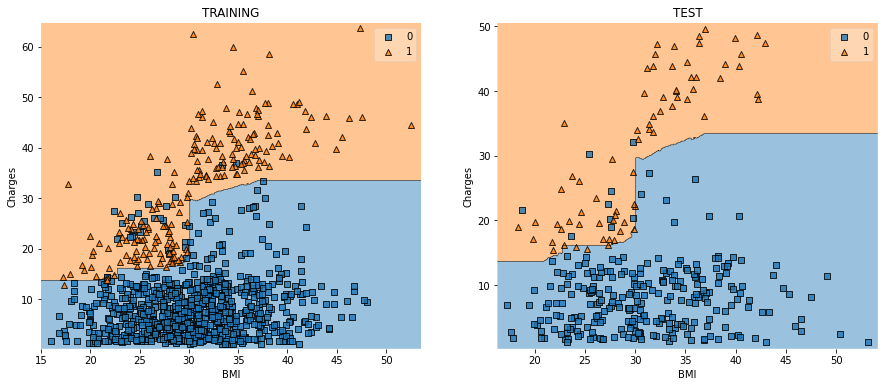

In [ ]:
# Decision Regions

from sklearn.model_selection import train_test_split 
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

X = data[['bmi', 'charges']]
y = data['smoker']

Xtraining, Xtest, ytraining, ytest  = train_test_split(X, y, test_size = 0.25)
 
model.fit(Xtraining, ytraining)

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(Xtraining.values, ytraining.values, clf = model, legend = 1)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('TRAINING')  

plt.subplot(1, 2, 2)
plot_decision_regions(Xtest.values, ytest.values, clf = model, legend = 1)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('TEST')   

plt.show()

#### Bagging

In [ ]:
# Bagging
from sklearn.ensemble import BaggingClassifier

model_base = LogisticRegression()
#model_base = KNeighborsClassifier(n_neighbors = 17)
#model_base = DecisionTreeClassifier(max_depth = 3)

model = BaggingClassifier(n_estimators = 50, base_estimator = model_base) 
measures = cross_validate(model, X, y, cv = validation, scoring = 'accuracy')
round(measures['test_score'].mean(),3)

0.932

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


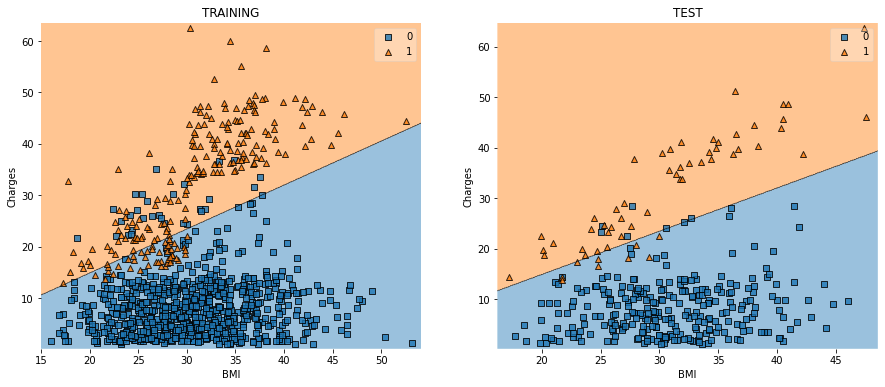

In [ ]:
# Decision Regions

from sklearn.model_selection import train_test_split 
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

X = data[['bmi', 'charges']]
y = data['smoker']

Xtraining, Xtest, ytraining, ytest  = train_test_split(X, y, test_size = 0.25)
 
model.fit(Xtraining, ytraining)

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(Xtraining.values, ytraining.values, clf = model, legend = 1)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('TRAINING')  

plt.subplot(1, 2, 2)
plot_decision_regions(Xtest.values, ytest.values, clf = model, legend = 1)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('TEST')   

plt.show()

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, max_depth = 5)
measures = cross_validate(model, X, y, cv = validation, scoring = 'accuracy')
round(measures['test_score'].mean(),3)

0.963

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


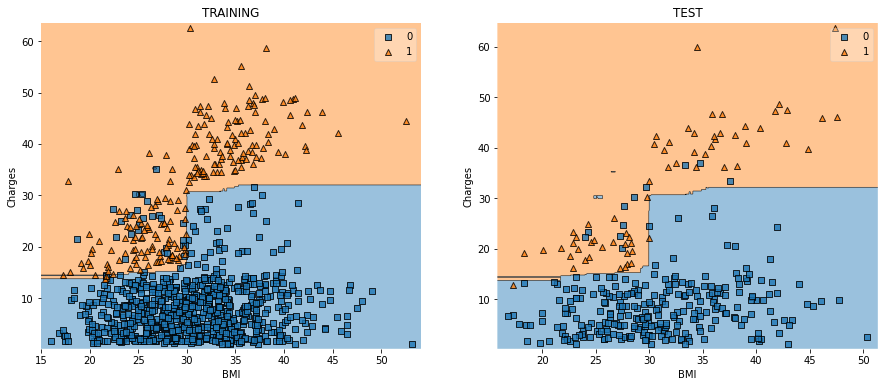

In [ ]:
# Decision Regions

from sklearn.model_selection import train_test_split 
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

X = data[['bmi', 'charges']]
y = data['smoker']

Xtraining, Xtest, ytraining, ytest  = train_test_split(X, y, test_size = 0.25)
 
model.fit(Xtraining, ytraining)

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(Xtraining.values, ytraining.values, clf = model, legend = 1)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('TRAINING')  

plt.subplot(1, 2, 2)
plot_decision_regions(Xtest.values, ytest.values, clf = model, legend = 1)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('TEST')   

plt.show()

In [ ]:
print(model.fit(Xtraining, ytraining))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


### Conclusion

Shortly, the accuracies were high applying hard or soft votes and for all models. As in the last classes, the health insurance charges were higher for increasing bmi, and smoker customers.